# Telco Customer Churn Prediction Project  
By: Anamezie Chukwuemeka David  
Date: July 2025

# IBM Telco Churn Prediction Project

This project aims to predict customer churn for a telecom company using a logistic regression model. We’ll explore what factors (like contract type, tenure, and monthly charges) contribute to customer churn, and build a model to help the business reduce customer loss.

##  Load the Dataset

We are using the IBM Telco Customer Churn dataset from Kaggle. First, we import pandas and load the CSV file using pd.read_csv(). This allows us to view and work with the data as a DataFrame in pandas.

import pandas as pd
df=pd.read_csv("WA_fn-UseC_-telco-customer-churn.csv")
df.head()

##  Understand the Dataset Structure

Before cleaning or analyzing, we need to understand what the data looks like — how many rows and columns, what kind of values we have, and if there are missing values.

We'll check:
- The shape of the data
- Column names and data types
- Missing values
- Basic info about the dataset

In [7]:
print ("shape:", df.shape)

shape: (7043, 21)


In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df["TotalCharges"].dtype

dtype('O')

## Split the Data into Train and Test Sets

We’ll split the dataset into features (X) and target (y), then divide it into training and testing sets using an 80/20 split.

In [17]:
X = df.drop('Churn', axis=1)  # remove the target column from the dataset
y = df['Churn']               # this is what we want to predict


In [20]:
# Step 4.1 — Split into Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 4.2 — Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

##  Feature Scaling

We scale the features so that all variables are on the same scale. This is important for many machine learning models.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training features and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Model Training and Evaluation - Logistic Regression

We’ll train a logistic regression model and evaluate its accuracy on the test set.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict churn using the test set
y_pred = model.predict(X_test_scaled)

# 1. Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7615330021291696

Confusion Matrix:
[[1019   17]
 [ 319   54]]

Classification Report:
              precision    recall  f1-score   support

          No       0.76      0.98      0.86      1036
         Yes       0.76      0.14      0.24       373

    accuracy                           0.76      1409
   macro avg       0.76      0.56      0.55      1409
weighted avg       0.76      0.76      0.70      1409



In [31]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Create a new column with absolute values of coefficients
feature_importance['Impact'] = feature_importance['Coefficient'].abs()

# Sort by highest impact
feature_importance = feature_importance.sort_values(by='Impact', ascending=False)

# Show top 10 features
feature_importance.head(10)

,Feature,Coefficient,Impact
1,tenure,-0.589423,0.589423
7066,Contract_Two year,-0.398040,0.398040
7051,InternetService_Fiber optic,0.396501,0.396501
7069,PaymentMethod_Electronic check,0.376743,0.376743
7054,OnlineSecurity_Yes,-0.332697,0.332697
7065,Contract_One year,-0.320716,0.320716
7060,TechSupport_Yes,-0.310676,0.310676
3940,customerID_5542-TBBWB,-0.274894,0.274894
7067,PaperlessBilling_Yes,0.236640,0.236640
7056,OnlineBackup_Yes,-0.212081,0.212081


C:\Users\USER\AppData\Local\Temp\ipykernel_2324\943464877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


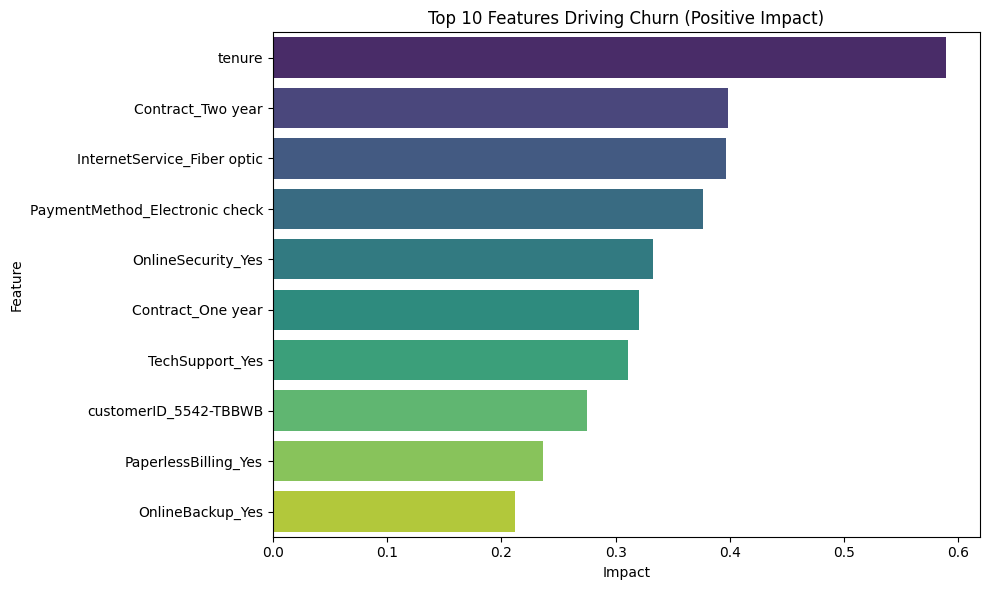

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10),
    x="Impact", y="Feature", palette="viridis"
)
plt.title("Top 10 Features Driving Churn (Positive Impact)")
plt.tight_layout()
plt.show()